# Skin cancer Prediction: malignant vs. Benign

Esteban Del Valle, 18221     
Andrea Paniagua, 18733

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image

In [2]:
import os
os.getcwd()

'C:\\Users\\Andrea Paniagua\\Documents\\7 semestre UVG\\Inteligencia artificial\\Proyecto'

In [3]:
print(os.listdir('C:\\Users\\Andrea Paniagua\\Documents\\7 semestre UVG\\Inteligencia artificial\\Proyecto'))

['.ipynb_checkpoints', 'Proyect.ipynb', 'Proyecto v2.ipynb', 'Test set Beni', 'Test set Malign', 'Train set benign', 'Train set malignant']


In [4]:
folder_benign_train = 'C:\\Users\\Andrea Paniagua\\Documents\\7 semestre UVG\\Inteligencia artificial\\Proyecto\\Train set benign\\benign'
folder_malignant_train ='C:\\Users\\Andrea Paniagua\\Documents\\7 semestre UVG\\Inteligencia artificial\\Proyecto\\Train set malignant\\data\\train\\malignant'

folder_benign_test = 'C:\\Users\\Andrea Paniagua\\Documents\\7 semestre UVG\\Inteligencia artificial\\Proyecto\\Test set Beni\\benign'
folder_malignant_test = 'C:\\Users\\Andrea Paniagua\\Documents\\7 semestre UVG\\Inteligencia artificial\\Proyecto\\Test set Malign\\malignant'

read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))

In [5]:
# Load in training pictures 
ims_benign = [read(os.path.join(folder_benign_train, filename)) for filename in os.listdir(folder_benign_train)]
X_benign = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_train, filename)) for filename in os.listdir(folder_malignant_train)]
X_malignant = np.array(ims_malignant, dtype='uint8')

In [6]:
# Load in testing pictures
ims_benign = [read(os.path.join(folder_benign_test, filename)) for filename in os.listdir(folder_benign_test)]
X_benign_test = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_test, filename)) for filename in os.listdir(folder_malignant_test)]
X_malignant_test = np.array(ims_malignant, dtype='uint8')

In [7]:
# Create labels
y_benign = np.zeros(X_benign.shape[0])
y_malignant = np.ones(X_malignant.shape[0])

In [8]:
y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])

In [9]:
# Merge data 
X_train = np.concatenate((X_benign, X_malignant), axis = 0)
y_train = np.concatenate((y_benign, y_malignant), axis = 0)
X_test = np.concatenate((X_benign_test, X_malignant_test), axis = 0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis = 0)

In [10]:
# Shuffle data
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
y_train = y_train[s]
s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
y_test = y_test[s]

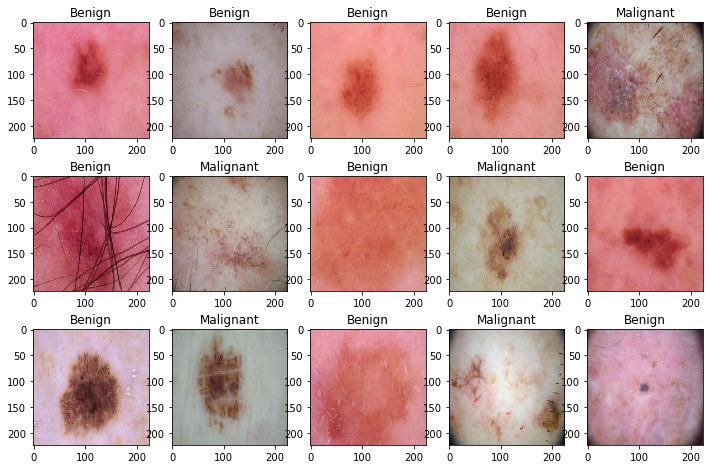

In [13]:
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

In [11]:
# support vector machine classifier
from sklearn.svm import SVC

model = SVC()

model.fit(X_train.reshape(X_train.shape[0],-1), y_train)

SVC()

In [12]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test.reshape(X_test.shape[0],-1))

print(accuracy_score(y_test, y_pred))

0.9655172413793104
